<a href="https://colab.research.google.com/github/wdyprtiwi/perbandingan_model/blob/main/UTS_DM_21082010093.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Nama : Widya Pratiwi** <br>
### **NPM  : 21082010093**

[Rekap Hasil Klasifikasi dan Evaluasi Klasifikasi](https://docs.google.com/spreadsheets/d/18X_Hb8N7J5Rb7Bpug_YRkmVZyuQ_jN8Dg3U-Gw9zDHo/edit?usp=sharing)

Penjelasan <br>
https://youtu.be/WvpZXE_vcmY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data mining with collab/data1.csv', sep=';')

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130.0,80.0,15.0,98.0,86,high risk
1,35,140.0,90.0,13.0,98.0,70,high risk
2,29,90.0,70.0,8.0,100.0,80,high risk
3,30,140.0,85.0,7.0,98.0,70,high risk
4,35,120.0,60.0,6.1,98.0,76,low risk


### No.1 <br>
Pada data ini akan dilakukan klasifikasi karena pada dataset sudah memiliki label yang jelas (RiskLevel) sehingga dapat melatih model untuk memprediksi label tersebut pada data baru yang belum diketahui. Tujuan dilakukan klasifikasi untuk memprediksi risiko berdasarkan variabel-variabel seperti usia, tekanan darah, dan detak jantung.

## Data Preparation

In [ ]:
df = pd.DataFrame(df)
print (df.shape)

(999, 7)


In [ ]:
print (df.dtypes)

Age              int64
SystolicBP     float64
DiastolicBP    float64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object


In [ ]:
# Mengecek missing value
print (df.isnull().sum())
print (df.shape)

Age            0
SystolicBP     1
DiastolicBP    2
BS             1
BodyTemp       4
HeartRate      0
RiskLevel      0
dtype: int64
(999, 7)


In [ ]:
# Mengisi data pada atribut SystolicBP dan BS dengan Modus
df['SystolicBP'].fillna(df['SystolicBP'].mode()[0], inplace=True)

df['BS'].fillna(df['BS'].mode()[0], inplace=True)

In [ ]:
# mengisi data pada atribut DiastolicBP dan BodyTemp dengan Mean
df['DiastolicBP'].fillna(df['DiastolicBP'].mean(), inplace=True)

df['BodyTemp'].fillna(df['BodyTemp'].mean(), inplace=True)

In [ ]:
print (df.isnull().sum())
print (df.shape)

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
(999, 7)


In [ ]:
label = {
    'low risk': 1,
    'mid risk': 2,
    'high risk': 3
}

In [ ]:
df['RiskLevel'].replace(label, inplace=True)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130.0,80.0,15.0,98.0,86,3
1,35,140.0,90.0,13.0,98.0,70,3
2,29,90.0,70.0,8.0,100.0,80,3
3,30,140.0,85.0,7.0,98.0,70,3
4,35,120.0,60.0,6.1,98.0,76,1


In [ ]:
print(df.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [ ]:
print(df.dtypes)

Age              int64
SystolicBP     float64
DiastolicBP    float64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel        int64
dtype: object


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,29.780781,113.218218,76.415246,8.666817,98.658693,74.300300,1.851852
std,13.414951,18.994948,13.835495,3.234295,1.360395,8.070451,0.802098
min,10.000000,12.000000,49.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,2.000000
75%,37.500000,120.000000,90.000000,8.000000,98.000000,80.000000,3.000000
max,70.000000,220.000000,100.000000,19.000000,103.000000,90.000000,3.000000


<Axes: >

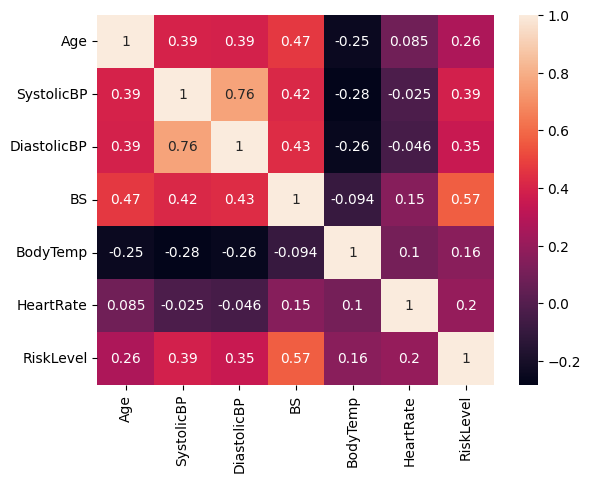

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

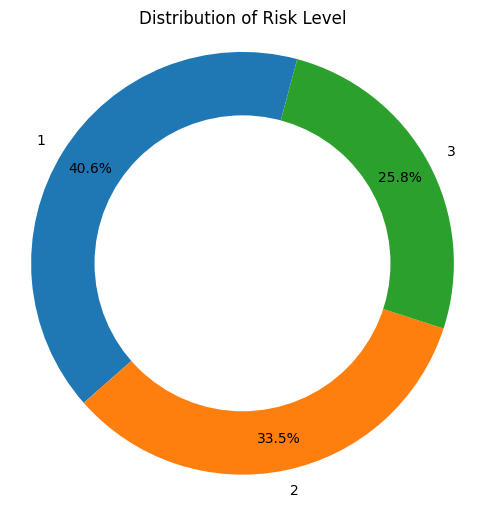

In [ ]:
# Distribusi risk level donut chart
data = df.groupby('RiskLevel').count()['Age']
plt.figure(figsize=(6, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=75, pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.axis('equal')

# Add title
plt.title('Distribution of Risk Level')

# Show the plot
plt.show();

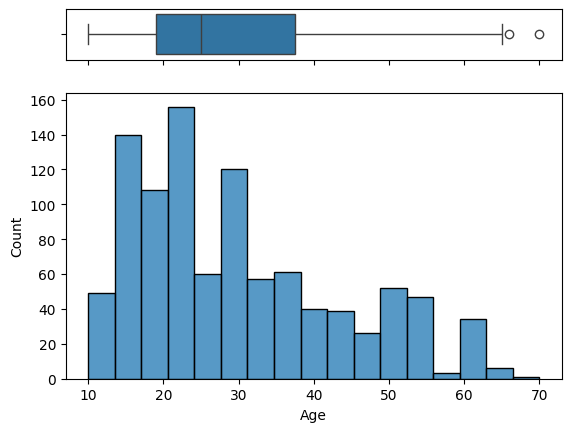

In [ ]:
# Distribusi Umur
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Assigning a graph to each ax
sns.boxplot(df["Age"], orient="h", ax=ax_box)
sns.histplot(data=df, x="Age", ax=ax_hist)
ax_hist.set(xlabel='Age')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show();

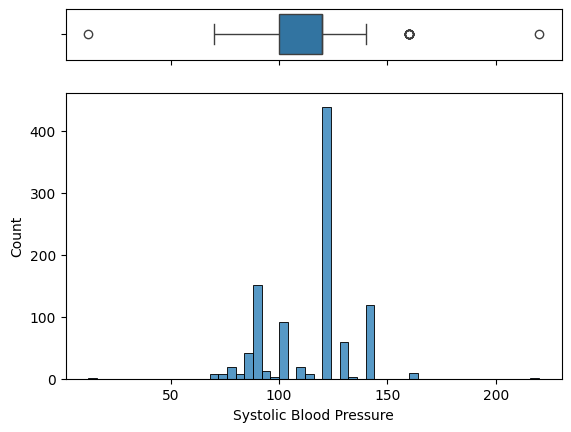

In [ ]:
# Distribusi SystolicBP
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df["SystolicBP"], orient="h", ax=ax_box)
sns.histplot(data=df, x="SystolicBP", ax=ax_hist)
ax_hist.set(xlabel='Systolic Blood Pressure')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show();

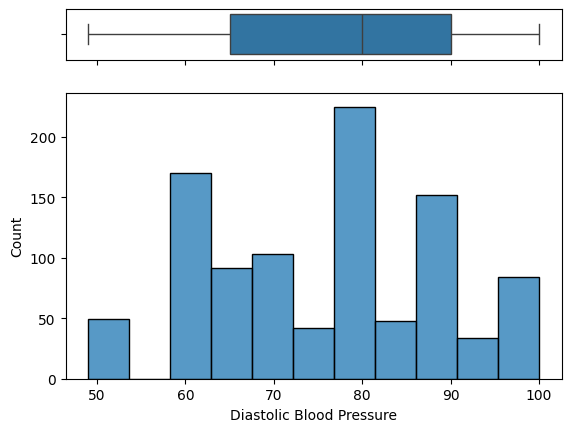

In [ ]:
# Distribusi DiastolicBP
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df["DiastolicBP"], orient="h", ax=ax_box)
sns.histplot(data=df, x="DiastolicBP", ax=ax_hist)
ax_hist.set(xlabel='Diastolic Blood Pressure')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show();

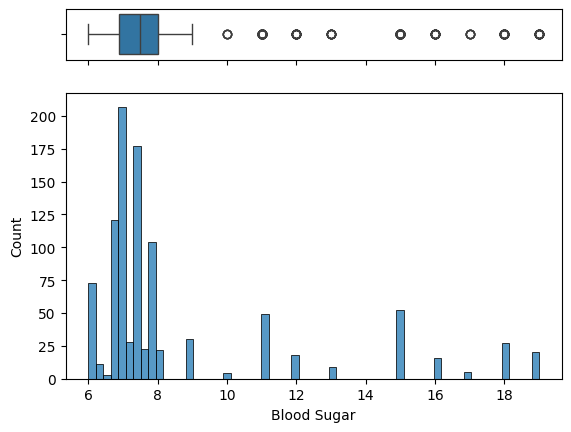

In [ ]:
# Distribution of Blood Sugar
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Assigning a graph to each ax
sns.boxplot(df["BS"], orient="h", ax=ax_box)
sns.histplot(data=df, x="BS", ax=ax_hist)
ax_hist.set(xlabel='Blood Sugar')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show();

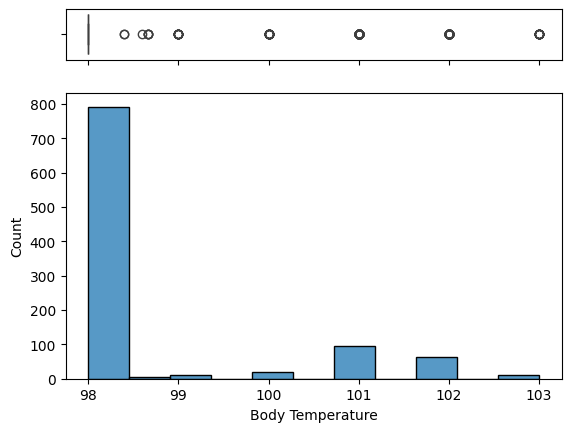

In [ ]:
# Distribusi BodyTemp
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df["BodyTemp"], orient="h", ax=ax_box)
sns.histplot(data=df, x="BodyTemp", ax=ax_hist)
ax_hist.set(xlabel='Body Temperature')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show();

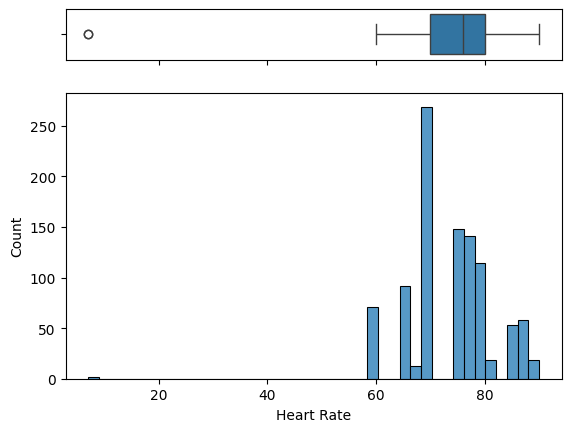

In [ ]:
# Distribusi Heart Rate
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Assigning a graph to each ax
sns.boxplot(df["HeartRate"], orient="h", ax=ax_box)
sns.histplot(data=df, x="HeartRate", ax=ax_hist)
ax_hist.set(xlabel='Heart Rate')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show();

## **Klasifikasi**

### No.3
### Decision Tree

Karena membuat model berbasis aturan dengan mempartisi dataset menjadi subset-subset berdasarkan fitur yang memberikan klasifikasi terbaik dan mudah diinterpretasi

### KNN

Karena dataset yang relatif kecil dan tidak membuat asumsi tentang distribusi data.

### Gradient Boosting
Karena mampu menangkap kompleksitas hubungan antar fitur, dan memberikan interpretabilitas yang cukup baik

### Logistic Regression
Karena memiliki hubungan linier antara fitur dan label, tidak banyaknya fitur

### Random Forest

Karena Random Forest mengurangi risiko overfit pada decision tree dengan menggabungkan hasil dari banyak pohon keputusan

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
xdata = df.drop('RiskLevel', axis=1)
ydata = df.RiskLevel

In [ ]:
# membagi prosentase 70% dan 30%
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.3, random_state=1)

In [ ]:
# membagi prosentase 80% dan 20%
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.2, random_state=1)

In [ ]:
# membagi prosentase 90% dan 10%
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.1, random_state=1)

In [ ]:
clf=DecisionTreeClassifier()

# belajar model
clf=clf.fit(xtrain,ytrain)

In [ ]:
# Predict on training set
clf_pred=clf.predict(xtest)

In [ ]:
print("Akurasi untuk data train adalah %.5f" % clf.score(xtrain, ytrain))
print("Akurasi untuk data test adalah",metrics.accuracy_score(ytest,clf_pred)*100)

Akurasi untuk data train adalah 0.92325
Akurasi untuk data test adalah 88.0


DecisionTreeClassifier()

<Figure size 5000x2500 with 0 Axes>

[Text(0.7648933946488294, 0.9722222222222222, 'BS <= 7.95\ngini = 0.656\nsamples = 999\nvalue = [406, 335, 258]\nclass = High Risk'),
 Text(0.6000209030100334, 0.9166666666666666, 'SystolicBP <= 132.5\ngini = 0.569\nsamples = 747\nvalue = [398, 278, 71]\nclass = High Risk'),
 Text(0.6824571488294314, 0.9444444444444444, 'True  '),
 Text(0.48641304347826086, 0.8611111111111112, 'BS <= 7.055\ngini = 0.525\nsamples = 701\nvalue = [398, 272, 31]\nclass = High Risk'),
 Text(0.2792642140468227, 0.8055555555555556, 'BodyTemp <= 99.5\ngini = 0.535\nsamples = 389\nvalue = [176, 198, 15]\nclass = Mid Risk'),
 Text(0.15384615384615385, 0.75, 'SystolicBP <= 125.0\ngini = 0.517\nsamples = 321\nvalue = [165.0, 150.0, 6.0]\nclass = High Risk'),
 Text(0.14715719063545152, 0.6944444444444444, 'DiastolicBP <= 49.5\ngini = 0.513\nsamples = 302\nvalue = [165, 131, 6]\nclass = High Risk'),
 Text(0.14046822742474915, 0.6388888888888888, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]\nclass = High Risk'),
 Te

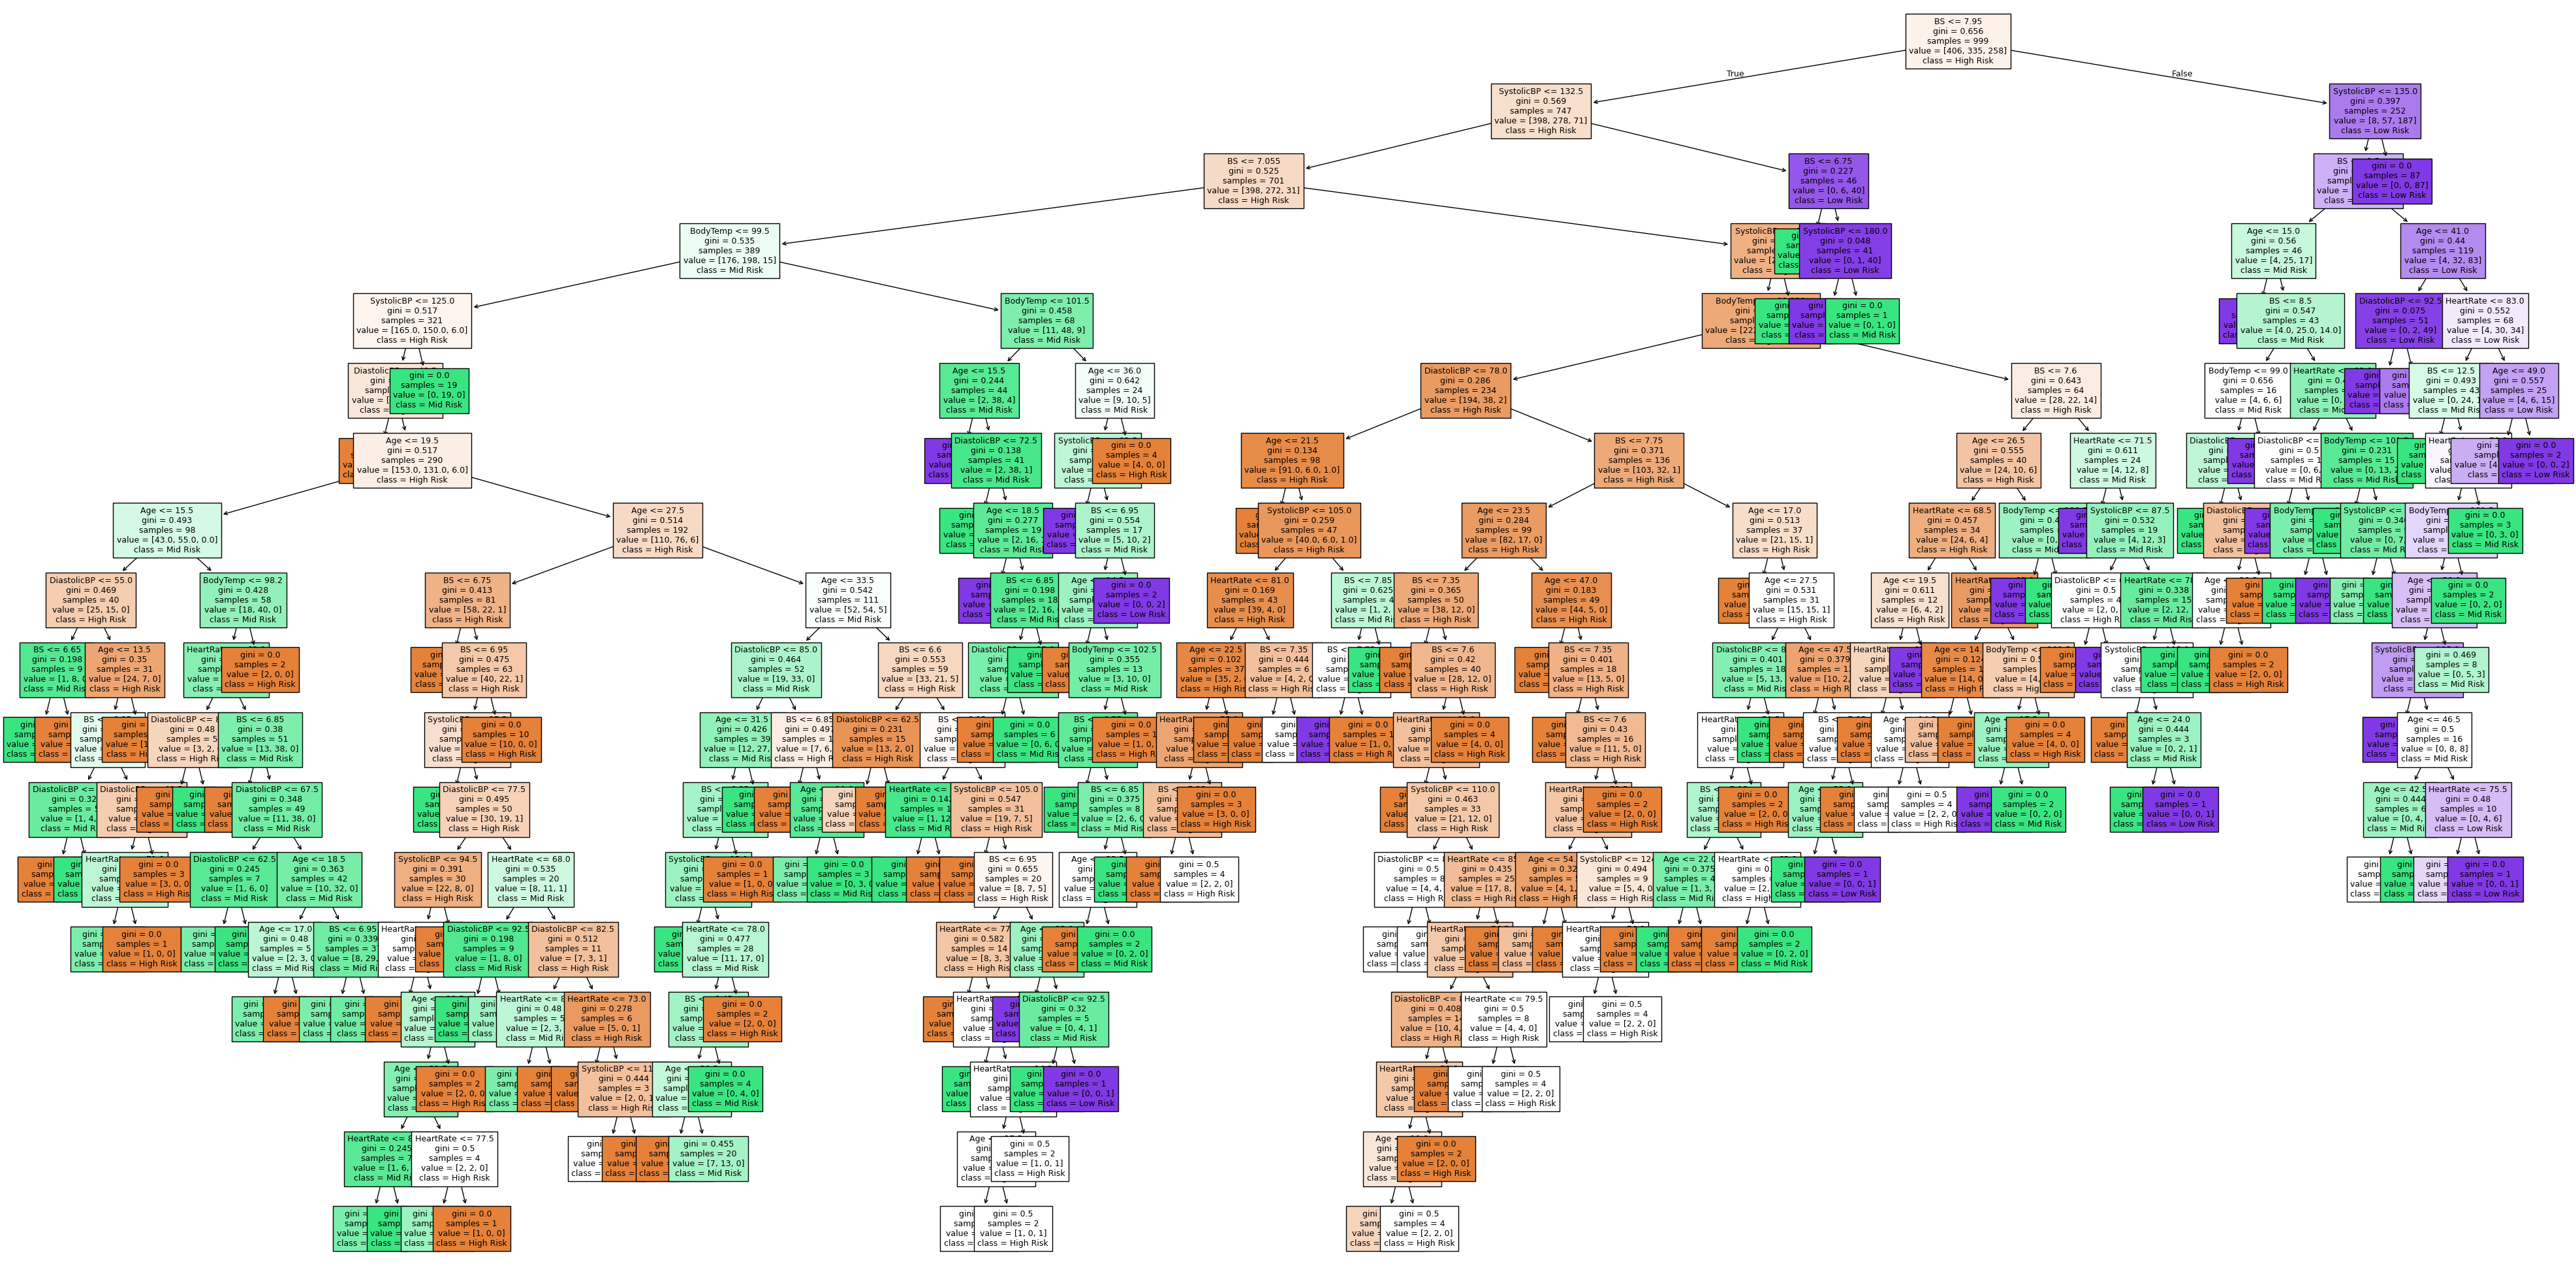

In [ ]:
# Visualisasi hasil dari Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = df.drop('RiskLevel', axis=1) # fitur
y = df['RiskLevel'] # target

dt_model = DecisionTreeClassifier()
dt_model.fit(X, y)

plt.figure(figsize=(50, 25))
plot_tree(dt_model, feature_names=X.columns, fontsize=9, class_names=['High Risk','Mid Risk', 'Low Risk'], filled=True)
plt.show()

### **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Xdata = df.drop('RiskLevel', axis=1)
Ydata = df.RiskLevel

In [ ]:
# membagi prosentase 70% dan 30%
xtrain,xtest,ytrain,ytest=train_test_split(Xdata,Ydata,test_size=0.3, random_state=1)

In [ ]:
# membagi prosentase 80% dan 20%
xtrain,xtest,ytrain,ytest=train_test_split(Xdata,Ydata,test_size=0.2, random_state=1)

In [ ]:
# membagi prosentase 90% dan 10%
xtrain,xtest,ytrain,ytest=train_test_split(Xdata,Ydata,test_size=0.1, random_state=1)

In [ ]:
knn=KNeighborsClassifier()

# belajar model
knn=knn.fit(xtrain,ytrain)

In [ ]:
# Predict on training set
knn_pred = knn.predict(xtest)

In [ ]:
print("Akurasi untuk data train adalah %.5f" % clf.score(xtrain, ytrain))
print("Akurasi untuk data test adalah",metrics.accuracy_score(ytest,knn_pred)*100)

Akurasi untuk data train adalah 0.92325
Akurasi untuk data test adalah 74.0


### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop('RiskLevel', axis=1)
Y = df.RiskLevel

In [ ]:
# membagi prosentase 70% dan 30%
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3, random_state=1)

In [ ]:
# membagi prosentase 80% dan 20%
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2, random_state=1)

In [ ]:
# membagi prosentase 90% dan 10%
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.1, random_state=1)

In [ ]:
lg = LogisticRegression()

# belajar model
lg = lg.fit(xtrain,ytrain)

In [ ]:
# Predict on training set
lg_pred = lg.predict(xtest)

In [ ]:
print("Akurasi untuk data train adalah %.5f" % clf.score(xtrain, ytrain))
print("Akurasi untuk data test adalah",metrics.accuracy_score(ytest, lg_pred)*100)

Akurasi untuk data train adalah 0.92325
Akurasi untuk data test adalah 62.0


### **Gradien Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
x = df.drop('RiskLevel', axis=1)
y = df.RiskLevel

In [ ]:
# membagi prosentase 70% dan 30%
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=1)

In [ ]:
# membagi prosentase 80% dan 20%
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
# membagi prosentase 90% dan 10%
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1, random_state=1)

In [ ]:
gb = GradientBoostingClassifier()

# belajar model
gb = gb.fit(xtrain,ytrain)

In [ ]:
# Predict on training set
gb_pred = gb.predict(xtest)

In [ ]:
print("Akurasi untuk data train adalah %.5f" % clf.score(xtrain, ytrain))
print("Akurasi untuk data test adalah",metrics.accuracy_score(ytest, gb_pred)*100)

Akurasi untuk data train adalah 0.92325
Akurasi untuk data test adalah 81.0


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_data = df.drop('RiskLevel', axis=1)
y_data = df.RiskLevel

In [ ]:
# membagi prosentase 70% dan 30%
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.1, random_state=1)

In [ ]:
# membagi prosentase 80% dan 20%
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.1, random_state=1)

In [ ]:
# membagi prosentase 90% dan 10%
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.1, random_state=1)

In [ ]:
rf = RandomForestClassifier()

# belajar model
rf = rf.fit(xtrain,ytrain)

In [ ]:
# Predict on training set
rf_pred = rf.predict(xtest)

In [ ]:
print("Akurasi untuk data train adalah %.5f" % clf.score(xtrain, ytrain))
print("Akurasi untuk data test adalah",metrics.accuracy_score(ytest, rf_pred)*100)

Akurasi untuk data train adalah 0.92325
Akurasi untuk data test adalah 89.0


## **Evaluasi Klasifikasi Setiap Model**

### Evaluasi Model Decision Tree

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(ytest, clf_pred))

ValueError: Found input variables with inconsistent numbers of samples: [100, 200]

In [ ]:
pd.crosstab(ytest, clf_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,All
Actual,,,,
1,101,15,8,124
2,11,73,10,94
3,5,11,66,82
All,117,99,84,300


In [ ]:
print(classification_report(ytest, clf_pred))

              precision    recall  f1-score   support

           1       0.86      0.81      0.84       124
           2       0.74      0.78      0.76        94
           3       0.79      0.80      0.80        82

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



### Evaluasi Model KNN

In [ ]:
pd.crosstab(ytest, knn_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [ ]:
print(classification_report(ytest, knn_pred))

### Evaluasi Model Gradient Boosting

In [ ]:
pd.crosstab(ytest, gb_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [ ]:
print(classification_report(ytest, gb_pred))

### Evaluasi Logistic Regression

In [ ]:
pd.crosstab(ytest, lg_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [ ]:
print(classification_report(ytest, lg_pred))

### Evaluasi Random Forest

In [ ]:
pd.crosstab(ytest, rf_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [ ]:
print(classification_report(ytest, rf_pred))

## **Pembagian Cross-Val**

In [ ]:
from sklearn.model_selection import cross_val_score

### Decision Tree

In [ ]:
clf = DecisionTreeClassifier()

scores_accuracy = cross_val_score(clf, xdata, ydata, cv=5, scoring='accuracy')

print(scores_accuracy)
print("Rata-Rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))
print("============================================")
scores_precision = cross_val_score(clf, xdata, ydata, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-Rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))
print("============================================")
scores_recall = cross_val_score(clf, xdata, ydata, cv=5, scoring='recall_macro')
print(scores_recall)
print("Rata-Rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))
print("============================================")
scores_f1 = cross_val_score(clf, xdata, ydata, cv=5, scoring='f1_macro')
print(scores_f1)
print("Rata-Rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.915      0.745      0.725      0.755      0.87939698]
Rata-Rata Nilai Akurasi: 0.80 (+/- 0.08)
[0.9207456  0.78374367 0.75450563 0.83339981 0.88257576]
Rata-Rata Nilai Precision Macro: 0.83 (+/- 0.06)
[0.91732104 0.76306384 0.72910849 0.78325731 0.88177486]
Rata-Rata Nilai Recall Macro: 0.81 (+/- 0.07)
[0.92204603 0.75593434 0.73582483 0.76656693 0.87832276]
Rata-Rata Nilai F1 Macro: 0.81 (+/- 0.07)


### KNN

In [ ]:
knn = KNeighborsClassifier()

scores_accuracy = cross_val_score(knn, Xdata, Ydata, cv=5, scoring='accuracy')

print(scores_accuracy)
print("Rata-Rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))
print("============================================")
scores_precision = cross_val_score(knn, Xdata, Ydata, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-Rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))
print("============================================")
scores_recall = cross_val_score(knn, Xdata, Ydata, cv=5, scoring='recall_macro')
print(scores_recall)
print("Rata-Rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))
print("============================================")
scores_f1 = cross_val_score(knn, Xdata, Ydata, cv=5, scoring='f1_macro')
print(scores_f1)
print("Rata-Rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.82       0.625      0.72       0.655      0.70351759]
Rata-Rata Nilai Akurasi: 0.70 (+/- 0.07)
[0.83310574 0.66077672 0.73460825 0.69483025 0.71223113]
Rata-Rata Nilai Precision Macro: 0.73 (+/- 0.06)
[0.82059314 0.60932989 0.71677935 0.65293451 0.70283297]
Rata-Rata Nilai Recall Macro: 0.70 (+/- 0.07)
[0.82594573 0.62097022 0.72376606 0.66757154 0.70572417]
Rata-Rata Nilai F1 Macro: 0.71 (+/- 0.07)


### Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()

scores_accuracy = cross_val_score(gb, x, y, cv=5, scoring='accuracy')

print(scores_accuracy)
print("Rata-Rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))
print("============================================")
scores_precision = cross_val_score(gb, x, y, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-Rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))
print("============================================")
scores_recall = cross_val_score(gb, x, y, cv=5, scoring='recall_macro')
print(scores_recall)
print("Rata-Rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))
print("============================================")
scores_f1 = cross_val_score(gb, x, y, cv=5, scoring='f1_macro')
print(scores_f1)
print("Rata-Rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.815     0.62      0.675     0.75      0.7839196]
Rata-Rata Nilai Akurasi: 0.73 (+/- 0.07)
[0.83020459 0.67647887 0.69810794 0.77576688 0.78341322]
Rata-Rata Nilai Precision Macro: 0.75 (+/- 0.06)
[0.81599245 0.64192924 0.69379716 0.76033986 0.78874328]
Rata-Rata Nilai Recall Macro: 0.74 (+/- 0.06)
[0.82558781 0.63928117 0.69137838 0.76705196 0.78546219]
Rata-Rata Nilai F1 Macro: 0.74 (+/- 0.07)


### Logistic Regression

In [ ]:
lg = LogisticRegression()

scores_accuracy = cross_val_score(lg, X, Y, cv=5, scoring='accuracy')

print(scores_accuracy)
print("Rata-Rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))
print("============================================")
scores_precision = cross_val_score(lg, X, Y, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-Rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))
print("============================================")
scores_recall = cross_val_score(lg, X, Y, cv=5, scoring='recall_macro')
print(scores_recall)
print("Rata-Rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))
print("============================================")
scores_f1 = cross_val_score(lg, X, Y, cv=5, scoring='f1_macro')
print(scores_f1)
print("Rata-Rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.6       0.605     0.55      0.56      0.5879397]
Rata-Rata Nilai Akurasi: 0.58 (+/- 0.02)
[0.61674357 0.61461692 0.59335955 0.59250905 0.60065508]
Rata-Rata Nilai Precision Macro: 0.60 (+/- 0.01)
[0.58102649 0.58657685 0.53986832 0.56451839 0.5771614 ]
Rata-Rata Nilai Recall Macro: 0.57 (+/- 0.02)
[0.57468297 0.56604164 0.55230352 0.57495806 0.57884814]
Rata-Rata Nilai F1 Macro: 0.57 (+/- 0.01)


### Random Forest

In [ ]:
rf = RandomForestClassifier()

scores_accuracy = cross_val_score(rf, x_data, y_data, cv=5, scoring='accuracy')

print(scores_accuracy)
print("Rata-Rata Nilai Akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std()))
print("============================================")
scores_precision = cross_val_score(rf, x_data, y_data, cv=5, scoring='precision_macro')
print(scores_precision)
print("Rata-Rata Nilai Precision Macro: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std()))
print("============================================")
scores_recall = cross_val_score(rf, x_data, y_data, cv=5, scoring='recall_macro')
print(scores_recall)
print("Rata-Rata Nilai Recall Macro: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std()))
print("============================================")
scores_f1 = cross_val_score(rf, x_data, y_data, cv=5, scoring='f1_macro')
print(scores_f1)
print("Rata-Rata Nilai F1 Macro: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std()))

[0.89       0.71       0.8        0.8        0.87437186]
Rata-Rata Nilai Akurasi: 0.81 (+/- 0.06)
[0.91686658 0.77097902 0.80328757 0.85088509 0.88060996]
Rata-Rata Nilai Precision Macro: 0.84 (+/- 0.05)
[0.93607698 0.73196222 0.81236269 0.81577764 0.87765963]
Rata-Rata Nilai Recall Macro: 0.83 (+/- 0.07)
[0.87717799 0.72296063 0.80128943 0.81928206 0.86991354]
Rata-Rata Nilai F1 Macro: 0.82 (+/- 0.06)


### **Evaluasi Model-ROC AUC**

KNeighborsClassifier()

RandomForestClassifier()

LogisticRegression()

GradientBoostingClassifier()

DecisionTreeClassifier()

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve Comparison for Multi-Class Models')

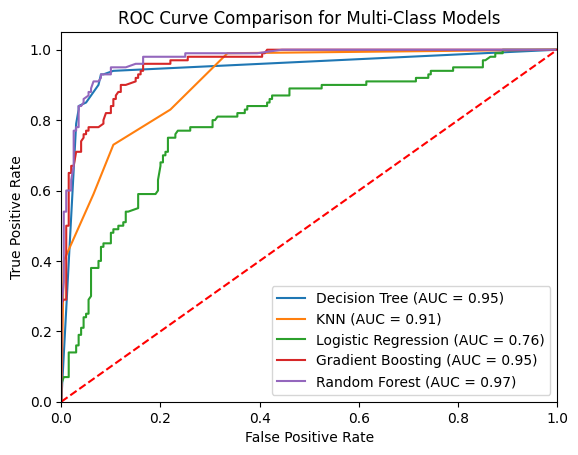

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Pastikan model sudah dilatih
knn.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)
lg.fit(xtrain, ytrain)
gb.fit(xtrain, ytrain)
clf.fit(xtrain, ytrain)

# Model-model yang sudah dilatih
models = {
    'Decision Tree': clf,
    'KNN': knn,
    'Logistic Regression': lg,
    'Gradient Boosting': gb,
    'Random Forest': rf
}

# Binarisasi ytest untuk multi-class (dengan menyiapkan format one-vs-rest)
ytest_binarized = label_binarize(ytest, classes=np.unique(ytrain))

# Inisialisasi figure untuk plotting
plt.figure()

# Looping untuk menghitung ROC AUC dan plot ROC curve tiap model
for model_name, model in models.items():
    # Dapatkan probabilitas prediksi dari semua kelas
    model_proba = model.predict_proba(xtest)

    # Untuk multi-class, hitung ROC AUC menggunakan strategi one-vs-rest
    roc_auc = roc_auc_score(ytest_binarized, model_proba, multi_class='ovr')

    # Dapatkan FPR dan TPR untuk ROC curve dari setiap kelas (one-vs-rest)
    fpr, tpr, _ = roc_curve(ytest_binarized.ravel(), model_proba.ravel())

    # Plot ROC curve untuk masing-masing model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Tambahkan garis referensi (ROC untuk prediksi acak)
plt.plot([0, 1], [0, 1], 'r--')

# Atur sumbu dan label
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multi-Class Models')

# Tambahkan legenda untuk masing-masing model
plt.legend(loc="lower right")

plt.show()